In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
gpu = tf.config.experimental.list_physical_devices('CPU')
print(gpu)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
#################DATA AUGMENTATION##############################
#################no need to run this##############################
"""
# Directories for datasets
bract_mosaic_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/bractmosaic'
insect_pest_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/insectpest'
moko_pest_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/moko'

# Directories to save augmented images
augmented_bract_mosaic_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_bractmosaic'
augmented_insect_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_insectpest'
augmented_moko_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_moko'

# Function to load and preprocess images
def load_and_preprocess_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    return img

# Function to apply augmentations
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    return image

# Create a list of file paths for each class
def get_image_paths(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.jpg')]

# Save augmented images
def save_augmented_images(dataset, save_dir, num_augmentations):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    count = 0
    for file_path in dataset:
        image = load_and_preprocess_image(file_path)
        for i in range(num_augmentations):
            augmented_image = augment_image(image)
            save_path = os.path.join(save_dir, f'aug_{count}_{i}.jpg')
            tf.io.write_file(save_path, tf.image.encode_jpeg(tf.cast(augmented_image, tf.uint8)))
        count += 1

# Get file paths
images_bs = get_image_paths(bract_mosaic_dataset_dir)
images_ip = get_image_paths(insect_pest_dataset_dir)
images_mp = get_image_paths(moko_pest_dataset_dir)

# Define the number of augmentations per image
num_augmentations = 5

# Save augmented images for each class
save_augmented_images(images_bs, augmented_bract_mosaic_dir, num_augmentations)
save_augmented_images(images_ip, augmented_insect_pest_dir, num_augmentations)
save_augmented_images(images_mp, augmented_moko_pest_dir, num_augmentations)
"""

"\n# Directories for datasets\nbract_mosaic_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/bractmosaic'\ninsect_pest_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/insectpest'\nmoko_pest_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/moko'\n\n# Directories to save augmented images\naugmented_bract_mosaic_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_bractmosaic'\naugmented_insect_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_insectpest'\naugmented_moko_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_moko'\n\n# Function to load and preprocess images\ndef load_and_preprocess_image(file_path):\n    img = tf.io.read_file(file_path)\n    img = tf.image.decode_jpeg(img, channels=3)\n    img = tf.image.resize(img, [224, 224])\n    return img\n\n# Function to apply augmentations\ndef augment_im

In [ ]:
#################################################data augmentation II#############################################
"""import os
import random
bract_mosaic_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/bractmosaic'
moko_pest_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/moko'

augmented_bract_mosaic_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_bractmosaic'
augmented_moko_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_moko'

def load_and_preprocess_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    return img

def augment_image(image):
    image = tf.image.rot90(image, k=random.randint(0, 3)) # Random flip (horizontal and vertical)
    if random.random() > 0.5:
        image = tf.image.flip_left_right(image)
    if random.random() > 0.5:
        image = tf.image.flip_up_down(image)

    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.2)

    # Random zoom
    scales = list(np.arange(0.8, 1.0, 0.1))
    boxes = np.zeros((len(scales), 4))
    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[i] = [x1, y1, x2, y2]
    def random_crop(img):
        crop_size = tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)
        crop_size = tf.gather(boxes, crop_size)
        return tf.image.crop_and_resize([img], boxes=[crop_size], box_indices=[0], crop_size=(image.shape[0], image.shape[1]))[0]

    image = random_crop(image)

    # Random rotation
    degrees = random.randint(0, 180)
    image = tf.image.rot90(image, k=degrees // 90)
    return image

def get_image_paths(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.jpg')]

# Save augmented images
def save_augmented_images(dataset, save_dir, num_augmentations):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    count = 300
    for file_path in dataset:
        image = load_and_preprocess_image(file_path)
        for i in range(num_augmentations):
            augmented_image = augment_image(image)
            save_path = os.path.join(save_dir, f'aug_{count}_{i}.jpg')
            tf.io.write_file(save_path, tf.image.encode_jpeg(tf.cast(augmented_image, tf.uint8)))
        count += 1

# Get file paths
images_bs = get_image_paths(bract_mosaic_dataset_dir)
images_mp = get_image_paths(moko_pest_dataset_dir)

# Define the number of augmentations per image
num_augmentations = 4

# Save augmented images for each class
save_augmented_images(images_bs, augmented_bract_mosaic_dir, num_augmentations)
save_augmented_images(images_mp, augmented_moko_pest_dir, num_augmentations)"""


In [4]:
healthy_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/healthy'
cordona_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/cordana'
pesta_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/pestalotiopsis'
siga_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/sigatoka'
augmented_bract_mosaic_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_bractmosaic'
augmented_insect_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_insectpest'
augmented_moko_pest_dir = r'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/augmented_moko'

images_h = []#400
images_c = []#328
images_p =[]#345
images_s= []#322
images_bs=[]#450
images_ip=[]#430
images_mp=[]#495

for filename in os.listdir(healthy_dataset_dir):
  img = (os.path.join(healthy_dataset_dir,filename))
  images_h.append(img)
for filename in os.listdir(cordona_dataset_dir):
  img = (os.path.join(cordona_dataset_dir,filename))
  images_c.append(img)
for filename in os.listdir(pesta_dataset_dir):
  img = (os.path.join(pesta_dataset_dir,filename))
  images_p.append(img)
for filename in os.listdir(siga_dataset_dir):
  img = (os.path.join(siga_dataset_dir,filename))
  images_s.append(img)
for filename in os.listdir(augmented_bract_mosaic_dir):
  img = (os.path.join(augmented_bract_mosaic_dir,filename))
  images_bs.append(img)
for filename in os.listdir(augmented_insect_pest_dir):
  img = (os.path.join(augmented_insect_pest_dir,filename))
  images_ip.append(img)
for filename in os.listdir(augmented_moko_pest_dir):
  img = (os.path.join(augmented_moko_pest_dir,filename))
  images_mp.append(img)

In [5]:
import random
random.shuffle(images_h)
random.shuffle(images_c)
random.shuffle(images_p)
random.shuffle(images_s)
random.shuffle(images_bs)
random.shuffle(images_ip)
random.shuffle(images_mp)

In [6]:
print(len(images_h))
print(len(images_c))
print(len(images_p))
print(len(images_s))
print(len(images_bs))
print(len(images_ip))
print(len(images_mp))

400
328
345
322
450
430
495


In [7]:
#train :270
#test 270:310
train = images_h[:256] + images_c[:256] + images_p[:256] + images_s[:256] + images_bs[:256] + images_ip[:256] + images_mp[:256]
test = images_h[256:320] + images_c[256:320] + images_p[256:320] + images_s[256:320] + images_bs[256:320] + images_ip[256:320] + images_mp[256:320]

In [ ]:
len(train)

1792

In [ ]:
train[640]

'/content/drive/MyDrive/Colab Notebooks/BananaLSD/AugmentedSet/pestalotiopsis/189_aug.jpeg'

In [ ]:
img  = cv2.imread(images_bs[35]) #224x224x3

array([[[ 76, 147, 161],
        [ 69, 140, 154],
        [ 73, 144, 158],
        ...,
        [155, 206, 238],
        [158, 213, 252],
        [151, 206, 249]],

       [[ 71, 142, 156],
        [ 63, 134, 148],
        [ 67, 138, 152],
        ...,
        [101, 155, 185],
        [ 72, 128, 163],
        [137, 194, 233]],

       [[ 65, 137, 149],
        [ 57, 129, 141],
        [ 45, 114, 129],
        ...,
        [176, 236, 255],
        [ 79, 137, 166],
        [152, 209, 241]],

       ...,

       [[162, 191, 206],
        [142, 168, 182],
        [ 58,  78,  89],
        ...,
        [ 36,  69,  84],
        [ 46,  75,  96],
        [ 57,  84, 105]],

       [[136, 162, 176],
        [122, 144, 156],
        [ 79,  96, 105],
        ...,
        [ 33,  63,  80],
        [ 42,  73,  96],
        [ 50,  81, 104]],

       [[ 95, 118, 133],
        [ 71,  93, 105],
        [ 68,  83,  92],
        ...,
        [ 51,  81, 100],
        [ 44,  75,  98],
        [ 51,  82, 107]]], dtype=uint8)
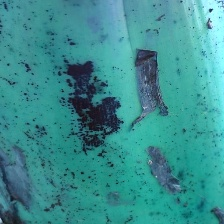

In [ ]:
img

In [8]:
import pandas as pd
from glob import glob
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, AveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, losses

In [9]:
shape = [224,224]
classes = 7
batch_size = 32
epochs = 10

In [10]:
class_values = []
class_values2 = []

df_train = pd.DataFrame({"image_path": train})
df_test = pd.DataFrame({"image_path": test})

for i in range(len(df_train)):
  if i<256:
    class_values.append('healthy')
  elif 256<=i<512:
    class_values.append('cordana')
  elif 512<=i<768:
    class_values.append('pestalotiopsis')
  elif 768<=i<1024:
    class_values.append('sigatoka')
  elif 1024<=i<1280:
    class_values.append('bractmosaic')
  elif 1280<=i<1536:
    class_values.append('insectpest')
  else:
    class_values.append('mokopest')

for j in range(len(df_test)):
  if j<64:
    class_values2.append('healthy')
  elif 64<=j<128:
    class_values2.append('cordana')
  elif 128<=j<192:
    class_values2.append('pestalotiopsis')
  elif 192<=j<256:
    class_values2.append('sigatoka')
  elif 256<=j<320:
    class_values2.append('bractmosaic')
  elif 320<=j<384:
    class_values2.append('insectpest')
  else:
    class_values2.append('mokopest')

df_train["class"] = class_values
df_test["class"] = class_values2


In [11]:
#shuffle dataframe
df_train_shuffled = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test_shuffled = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_train_shuffled#/content/drive/MyDrive/Colab Notebooks/BananaL...

,image_path,class
0,/content/drive/MyDrive/Colab Notebooks/BananaL...,pestalotiopsis
1,/content/drive/MyDrive/Colab Notebooks/BananaL...,healthy
2,/content/drive/MyDrive/Colab Notebooks/BananaL...,bractmosaic
3,/content/drive/MyDrive/Colab Notebooks/BananaL...,cordana
4,/content/drive/MyDrive/Colab Notebooks/BananaL...,insectpest
...,...,...
1787,/content/drive/MyDrive/Colab Notebooks/BananaL...,bractmosaic
1788,/content/drive/MyDrive/Colab Notebooks/BananaL...,insectpest
1789,/content/drive/MyDrive/Colab Notebooks/BananaL...,sigatoka
1790,/content/drive/MyDrive/Colab Notebooks/BananaL...,insectpest


In [12]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_dataframe(dataframe = df_train_shuffled,
                                            x_col ='image_path',
                                            y_col = 'class',
                                            target_size=(224,224),
                                            shuffle=False,
                                            class_mode='categorical')
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_dataframe(x_col = 'image_path',
                                           y_col = 'class',
                                           dataframe = df_test_shuffled,
                                           target_size=(224,224),
                                           shuffle=False,
                                           class_mode='categorical')

Found 1792 validated image filenames belonging to 7 classes.
Found 448 validated image filenames belonging to 7 classes.


In [13]:
#CNN with 16 layers - VGG
from tensorflow.keras.regularizers import l2

vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu', kernel_regularizer=l2(0.01))(x)
x = Dense(64, activation = 'relu', kernel_regularizer=l2(0.01))(x)
x = Dense(classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)

#optimizer = adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#Lenet
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.optimizers import Adam

res = ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg'  # Use global average pooling
)

# Freeze the layers of ResNet
for layer in res.layers[-20:]:
    layer.trainable = True

# Add new layers for fine-tuning
x = res.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # Increased units
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)  # Increased units
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=res.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

234545216/234545216 [==============================] - 11s 0us/step


In [ ]:
#google net
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Freeze all the layers in the base model
for layer in base_model.layers[100:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Increased units for deeper learning
x = BatchNormalization()(x)
x = Dropout(0.3)(x)  # Reduced dropout rate
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
#mobilnet

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Load the MobileNetV2 model with pre-trained ImageNet weights
base_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)


# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

"""
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(7, activation='softmax')(x)
"""

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])


9406464/9406464 [==============================] - 1s 0us/step


In [14]:
#train model block
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
model.fit(train_data_gen,
          steps_per_epoch = training_steps_per_epoch,
          validation_data=test_data_gen,
          validation_steps=validation_steps_per_epoch,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stopping])
print('Training Completed!')

Epoch 1/10
56/56 [==============================] - 690s 12s/step - loss: 6.1286 - accuracy: 0.7467 - val_loss: 3.7774 - val_accuracy: 0.8996
Epoch 2/10
56/56 [==============================] - 11s 188ms/step - loss: 2.8882 - accuracy: 0.9648 - val_loss: 3.2828 - val_accuracy: 0.9397
Epoch 3/10
56/56 [==============================] - 11s 187ms/step - loss: 2.4010 - accuracy: 0.9849 - val_loss: 2.8406 - val_accuracy: 0.9442
Epoch 4/10
56/56 [==============================] - 10s 183ms/step - loss: 2.0439 - accuracy: 0.9927 - val_loss: 2.7103 - val_accuracy: 0.9241
Epoch 5/10
56/56 [==============================] - 10s 180ms/step - loss: 1.8184 - accuracy: 0.9872 - val_loss: 2.3502 - val_accuracy: 0.9442
Epoch 6/10
56/56 [==============================] - 10s 184ms/step - loss: 1.7156 - accuracy: 0.9782 - val_loss: 2.3694 - val_accuracy: 0.9397
Epoch 7/10
56/56 [==============================] - 10s 185ms/step - loss: 1.6649 - accuracy: 0.9777 - val_loss: 2.0284 - val_accuracy: 0.9353


In [15]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_data_gen.classes
cm = confusion_matrix(val_trues, val_preds)
# Print classification report for reference
print(classification_report(val_trues, val_preds))

14/14 [==============================] - 2s 134ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      1.00      1.00        64
           2       0.94      0.92      0.93        64
           3       0.95      0.98      0.97        64
           4       0.94      0.97      0.95        64
           5       0.98      0.94      0.96        64
           6       0.97      0.94      0.95        64

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



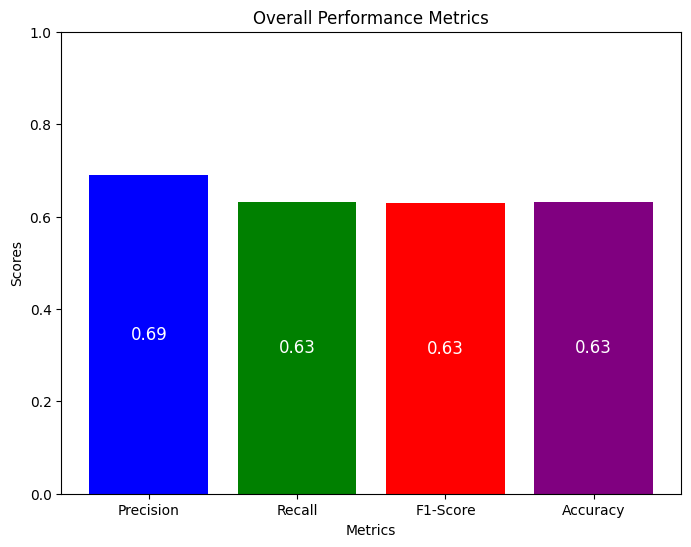

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(val_trues, val_preds, output_dict=True)

# Extract overall scores
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
scores = [precision, recall, f1_score, accuracy]

# Plot the overall scores
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])

# Add the scores inside the bars
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval/2, round(score, 2), ha='center', va='center', color='white', fontsize=12)

plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Overall Performance Metrics')

plt.savefig('lenet.png', dpi=300, bbox_inches='tight')
plt.show()

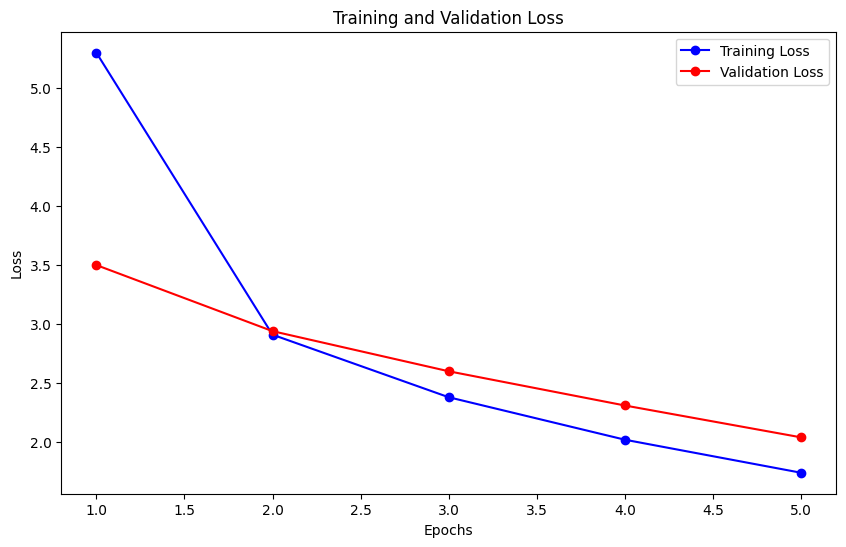

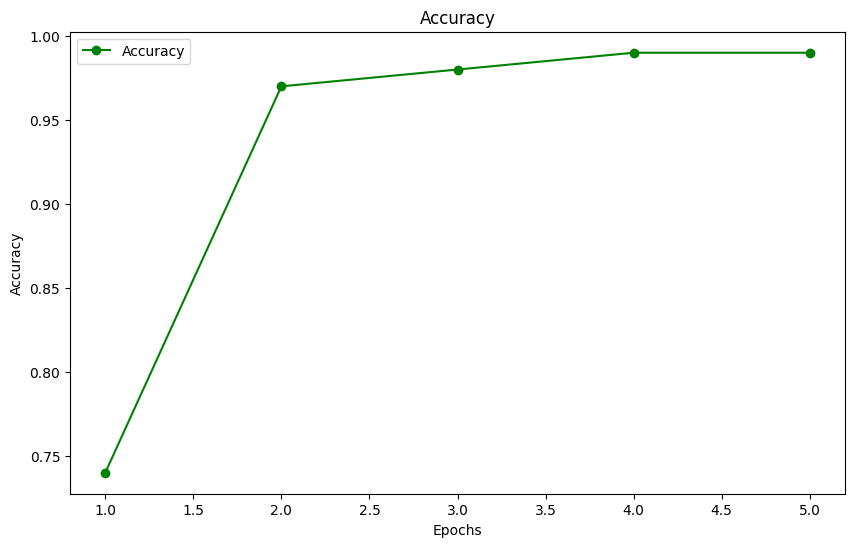

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists or arrays for training and validation loss
train_loss = [5.30, 2.91, 2.38, 2.02, 1.74]  # Example values
val_loss = [3.50, 2.94, 2.60, 2.31, 2.04]  # Example values

# Example supporting metric (accuracy)
accuracy = [0.74, 0.97, 0.98, 0.99, 0.99]

epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('vgg_loss.png', dpi=300, bbox_inches='tight')

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'go-', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('vgg_acc.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
keras_file="Model.h5"
tf.keras.models.save_model(model,keras_file)

<ipython-input-17-981ad33596cb>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,keras_file)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model('Model.h5')
img_path = ['']
for i in img_path:
  img = image.load_img(i, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds=model.predict(x)
  # create a list containing the class labels
  class_labels = ['cordona','healthy','pestalotiopsis','sigatoka','bract mosaic','insect pest','moko']
  # find the index of the class with maximum score
  pred = np.argmax(preds, axis=-1)
  # print the label of the class with maximum score
  print(class_labels[pred[0]])

FileNotFoundError: [Errno 2] No such file or directory: '1_aug.jpeg'

In [ ]:
#pes = 0,14
#h = 1,50,13,77
#c = 2,34
# s = 6,74